### 1. Exportaciones de Bolivia
primero es necesario identificar y diferenciar las exportaciones tradicionales de las no tradicionales, para posteriormente describirlas e identificar a las mas importantes

In [1]:
# First we need to import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We read the data frame data from the previus notebook
df_expo = pd.read_csv(r'./data/exportaciones_1992_2022.csv.zip', compression='zip', header=0, sep=',')
df_expo.columns

Index(['GESTION', 'MES', 'FLUJO', 'NANDINA', 'DESNAN', 'PAIS', 'DESPAIS',
       'MEDI', 'DESMEDI', 'VIASAL', 'DESVIA', 'DEPART', 'DESDEP', 'CUCI3',
       'DESCUCI3', 'GCE3', 'DESGCE3', 'CIIUR3', 'DESCIIU3', 'CLTNT', 'KILBRU',
       'VALOR'],
      dtype='object')

In [3]:
# we define this style for the plots
plt.style.use('fivethirtyeight')

In [4]:
# We change names of this categories for an easy understanding
df_expo.loc[df_expo['CLTNT'] == '1MINERALES', 'CLTNT'] = 'MINERALES'
df_expo.loc[df_expo['CLTNT'] == '2HIDROCARBUROS', 'CLTNT'] = 'HIDROCARBUROS'
df_expo.loc[df_expo['CLTNT'] == '3NO TRADICIONALES', 'CLTNT'] = 'NO TRADITIONAL'

We make an data frame for identify wich are the top 5 activities based on 'International Standard Industrial Classification' (ISIC) that involve each category of traditional an non-traditional exports

In [5]:
df_tnt = df_expo[df_expo['CLTNT'] == 'HIDROCARBUROS'].groupby(['CLTNT','CIIUR3','DESCIIU3'])['DESNAN'].count().reset_index(
    ).sort_values(by='DESNAN', ascending=False)
df_tnt = df_tnt.append(df_expo[df_expo['CLTNT'] == 'MINERALES'].groupby(['CLTNT','CIIUR3','DESCIIU3'])['DESNAN'].count().reset_index(
    ).sort_values(by='DESNAN', ascending=False)[:5])
df_tnt = df_tnt.append(df_expo[df_expo['CLTNT'] == 'NO TRADICIONALES'].groupby(['CLTNT','CIIUR3','DESCIIU3'])['DESNAN'].count().reset_index(
    ).sort_values(by='DESNAN', ascending=False)[:5])
df_1 = df_tnt[['CLTNT','CIIUR3', 'DESCIIU3']].reset_index(drop=True)
df_1

C:\Users\Windows\AppData\Local\Temp/ipykernel_15328/126463632.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tnt = df_tnt.append(df_expo[df_expo['CLTNT'] == 'MINERALES'].groupby(['CLTNT','CIIUR3','DESCIIU3'])['DESNAN'].count().reset_index(
C:\Users\Windows\AppData\Local\Temp/ipykernel_15328/126463632.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tnt = df_tnt.append(df_expo[df_expo['CLTNT'] == 'NO TRADICIONALES'].groupby(['CLTNT','CIIUR3','DESCIIU3'])['DESNAN'].count().reset_index(


,CLTNT,CIIUR3,DESCIIU3
0,HIDROCARBUROS,2320,Fabricación de productos de la refinación del ...
1,HIDROCARBUROS,1110,Extracción de petróleo crudo y de gas natural
2,HIDROCARBUROS,2699,Fabricación de otros productos minerales no me...
3,HIDROCARBUROS,2411,"Fabricación de sustancias químicas básicas, ex..."
4,HIDROCARBUROS,1429,Explotación de otras minas y canteras n.c.p.
5,MINERALES,1320,Extracción de minerales metalíferos no ferroso...
6,MINERALES,2720,Fabricación de productos primarios de metales ...
7,MINERALES,1421,Extracción de minerales para la fabricación de...
8,MINERALES,2411,"Fabricación de sustancias químicas básicas, ex..."
9,MINERALES,1429,Explotación de otras minas y canteras n.c.p.


Based on the previuos results, we make a new dataframe for view the top 5 products but now based on the 'standard international trade classification' (STIC)

In [6]:
# 
df_tnt = df_expo[df_expo['CLTNT'] == 'HIDROCARBUROS'].groupby(['CLTNT','CUCI3','DESCUCI3'])['DESNAN'].count().reset_index(
    ).sort_values(by='DESNAN', ascending=False)[:5]
df_tnt = df_tnt.append(df_expo[df_expo['CLTNT'] == 'MINERALES'].groupby(['CLTNT','CUCI3','DESCUCI3'])['DESNAN'].count().reset_index(
    ).sort_values(by='DESNAN', ascending=False)[:5])
df_tnt = df_tnt.append(df_expo[df_expo['CLTNT'] == 'NO TRADICIONALES'].groupby(['CLTNT','CUCI3','DESCUCI3'])['DESNAN'].count().reset_index(
    ).sort_values(by='DESNAN', ascending=False)[:5])
df_1 = df_tnt[['CLTNT','CUCI3', 'DESCUCI3']].reset_index(drop=True)
df_1

C:\Users\Windows\AppData\Local\Temp/ipykernel_15328/4204930869.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tnt = df_tnt.append(df_expo[df_expo['CLTNT'] == 'MINERALES'].groupby(['CLTNT','CUCI3','DESCUCI3'])['DESNAN'].count().reset_index(
C:\Users\Windows\AppData\Local\Temp/ipykernel_15328/4204930869.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tnt = df_tnt.append(df_expo[df_expo['CLTNT'] == 'NO TRADICIONALES'].groupby(['CLTNT','CUCI3','DESCUCI3'])['DESNAN'].count().reset_index(


,CLTNT,CUCI3,DESCUCI3
0,HIDROCARBUROS,3341,Gasolina para motores y otros aceites ligeros
1,HIDROCARBUROS,3432,"Gas natural, en estado gaseoso"
2,HIDROCARBUROS,3442,"Hidrocarburos gaseosos, licuados, n.e.p."
3,HIDROCARBUROS,3330,Aceites de petroleo y aceites obtenidos de min...
4,HIDROCARBUROS,3342,Keroseno y otros aceites medianos
5,MINERALES,2891,Minerales de metales preciosos y sus concentrados
6,MINERALES,2875,Minerales de zinc y sus concentrados
7,MINERALES,2789,"Minerales en bruto, n.e.p."
8,MINERALES,2874,Minerales de plomo y sus concentrados
9,MINERALES,6871,"Esta±o y sus aleaciones, en bruto"


From this firsts steps we can idemtify that principal exports of Hydrocarbons are natural gas, gas oil and gasoline, on the minerals category, principal exports are precious minerals, Zinc, tin and lead, Finally on the non-traditional category we have wood, cloths, seed oils and edible nuts.

Now that we have an idea of what products are involved, we can observe how evolve each of this categories over the years.

We select all values until 2021, because the data frame from 2022 is complete until august, we must work with complete information

In [7]:
valor_tnt = df_expo[df_expo['GESTION'] <= 2021].groupby(['GESTION','CLTNT']
                                    )['VALOR'].sum().unstack(1).div(1000000)
peso_tnt = df_expo[df_expo['GESTION'] <= 2021].groupby(['GESTION','CLTNT']
                                    )['KILBRU'].sum().unstack(1).div(1000000)
tnt_list = df_expo['CLTNT'].unique().tolist()

primero se quiere vizualiuzar cual a sido el comportamiento de estas categorias a lolargodel tiempo, primero de manera grupal y luego individualmente como lineas de tiempo

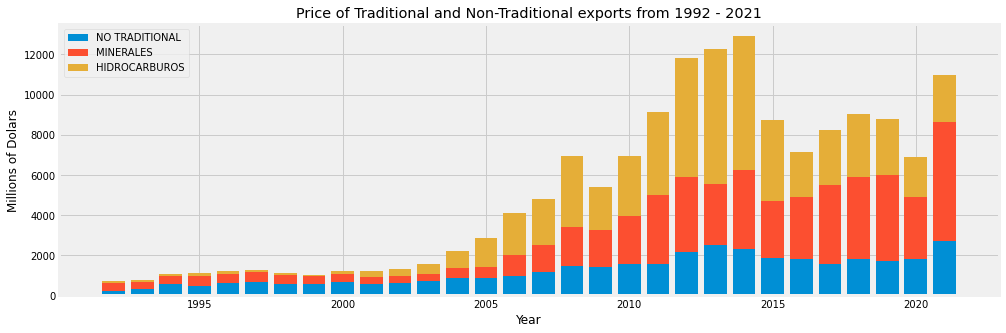

<Figure size 432x288 with 0 Axes>

In [8]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title('Price of Traditional and Non-Traditional exports from 1992 - 2021')
aux = 0
for tnt in tnt_list:
  axes.bar(valor_tnt.index, valor_tnt[tnt], bottom=aux, label=tnt)
  aux += valor_tnt[tnt]
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Millions of Dolars')
plt.show()

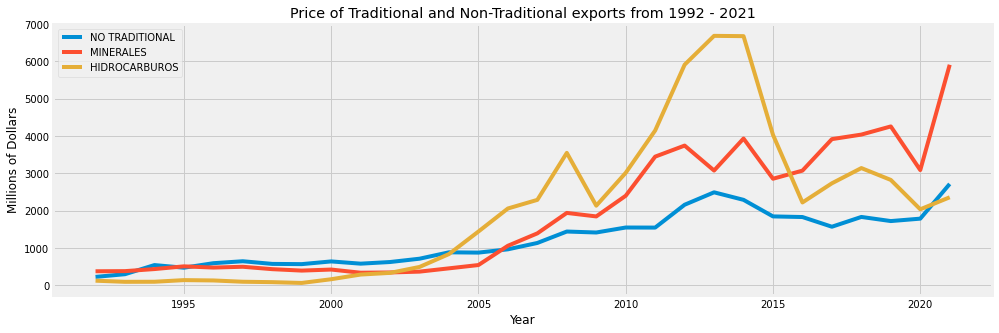

<Figure size 432x288 with 0 Axes>

In [9]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title('Price of Traditional and Non-Traditional exports from 1992 - 2021')
for tnt in tnt_list:
  axes.plot(valor_tnt.index, valor_tnt[tnt], label=tnt)
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Millions of Dollars')
plt.show()

De igual manera se realiza el mismo analisis pero ahora con el peso de estas categorias

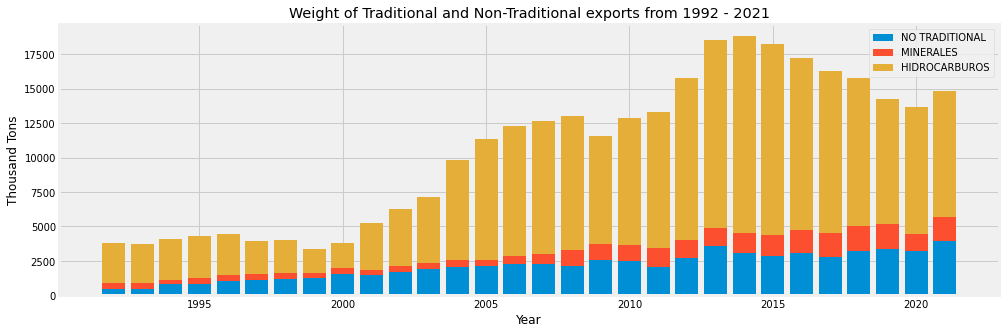

<Figure size 432x288 with 0 Axes>

In [10]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title('Weight of Traditional and Non-Traditional exports from 1992 - 2021')
aux = 0
for tnt in tnt_list:
  axes.bar(peso_tnt.index, peso_tnt[tnt], bottom=aux, label=tnt)
  aux += peso_tnt[tnt]
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Thousand Tons')
plt.show()

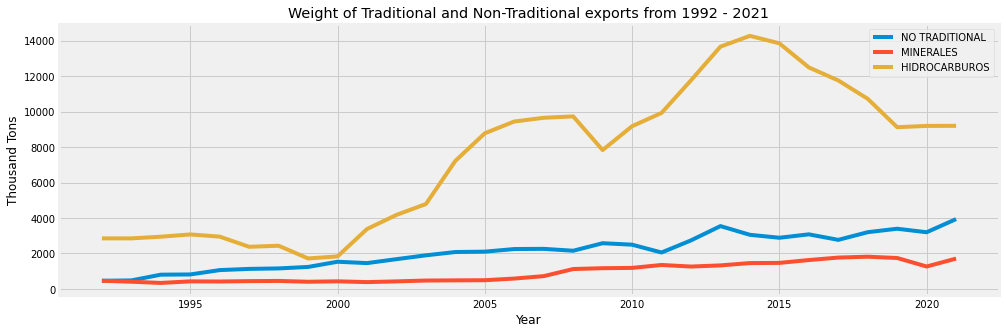

<Figure size 432x288 with 0 Axes>

In [11]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title('Weight of Traditional and Non-Traditional exports from 1992 - 2021')
for tnt in tnt_list:
  axes.plot(peso_tnt.index, peso_tnt[tnt], label=tnt)
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Thousand Tons')
plt.show()

Ahora es necesario revisar como es el comportamiento de valor y volumen pero de cada departamento del pais

In [12]:
valor_departamento = df_expo[df_expo['GESTION'] <= 2021].groupby(['GESTION','DESDEP']
)['VALOR'].sum().unstack(1).div(1000000)
peso_departamento = df_expo[df_expo['GESTION'] <= 2021].groupby(['GESTION','DESDEP']
)['KILBRU'].sum().unstack(1).div(1000000)
dep_list = df_expo['DESDEP'].unique().tolist()

para no tener problemas con los colores de las graficas definimos estos 9 colores para cada departametne

In [13]:
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']

al igual que en las aneteriores graficas, se evaluara por peso y precio de manera separada, pero ahora solo enfocoado en los nueve departamentos de Bolivia y tambien primero como grupo y luego individualmente

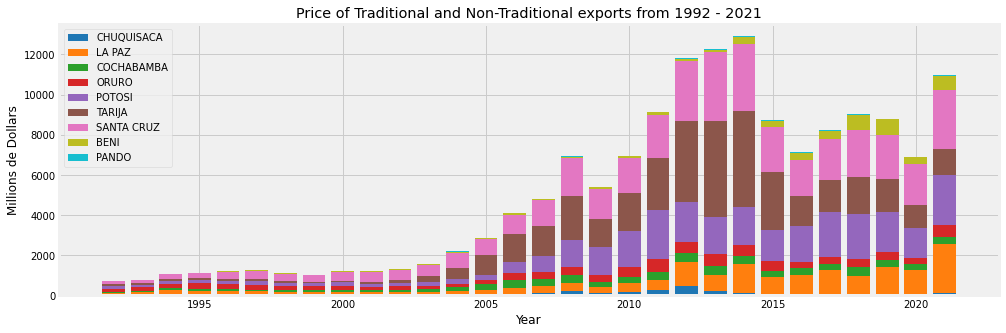

<Figure size 432x288 with 0 Axes>

In [14]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title('Price of Traditional and Non-Traditional exports from 1992 - 2021')
color_list = iter(color)
aux = 0
for dep in dep_list: 
  axes.bar(valor_departamento.index, valor_departamento[dep], bottom=aux, color=next(color_list), label=dep)
  aux += valor_departamento[dep]
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Millions de Dollars')
plt.show()

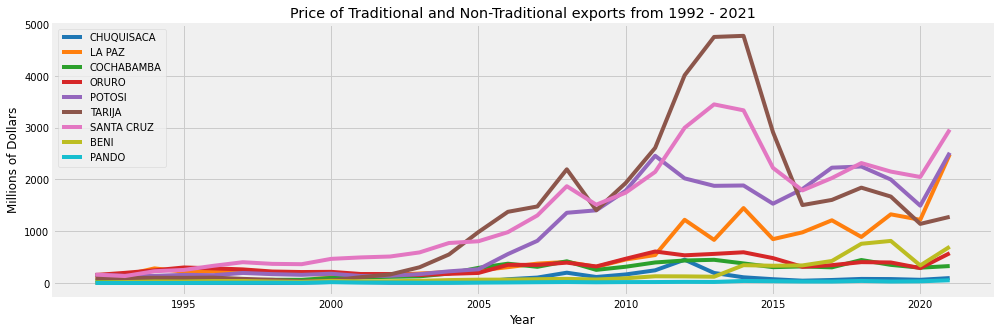

<Figure size 432x288 with 0 Axes>

In [15]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title('Price of Traditional and Non-Traditional exports from 1992 - 2021')
color_list = iter(color)
for dep in dep_list: 
  axes.plot(valor_departamento.index, valor_departamento[dep], label=dep, color=next(color_list))
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Millions of Dollars')
plt.show()

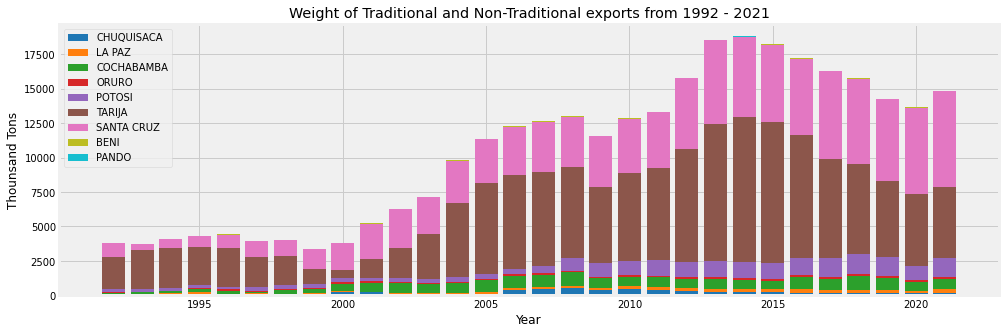

<Figure size 432x288 with 0 Axes>

In [16]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title('Weight of Traditional and Non-Traditional exports from 1992 - 2021')
color_list = iter(color)
aux = 0
for dep in dep_list: 
  axes.bar(peso_departamento.index, peso_departamento [dep], bottom=aux, label=dep, color=next(color_list))
  aux += peso_departamento[dep]
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Thounsand Tons')
plt.show()

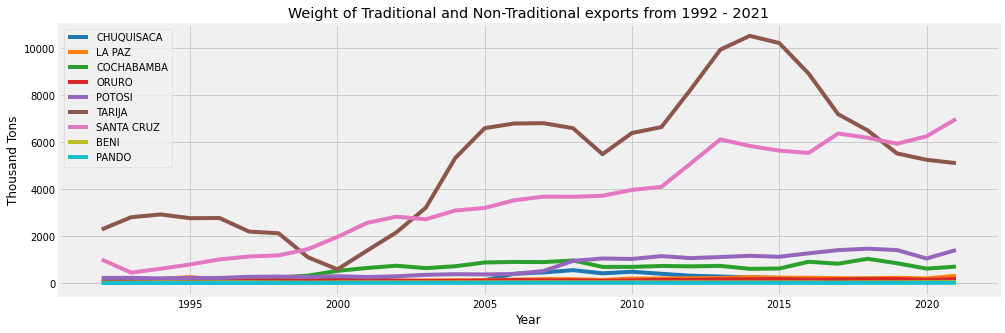

<Figure size 432x288 with 0 Axes>

In [17]:
fig, axes = plt.subplots(figsize=(15, 5))
axes.set_title('Weight of Traditional and Non-Traditional exports from 1992 - 2021')
color_list = iter(color)
for dep in dep_list: 
  axes.plot(peso_departamento.index, peso_departamento[dep], label=dep, color=next(color_list))
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Thousand Tons')
plt.show()

finalmente como ya hemos analizado estos, necesitams identificar cuales son los dos productos mas importantes por eso se hace el siguiente data frame para poder clasificarlos de acuerdo a su importantcia

In [18]:
df_expo_indv = df_expo[(df_expo['GESTION'] >= 2015) & (df_expo['GESTION'] <= 2021)]
top_expo_2021 = df_expo_indv.groupby(['CUCI3', 'DESCUCI3', 'CLTNT'])['VALOR'].sum().div(1000000).reset_index().sort_values(by='VALOR', ascending=False)
top_expo_2021['VALOR'] = top_expo_2021['VALOR'].round(2)
top_expo_2021['PAR_NAC(%)'] = (top_expo_2021['VALOR'] / (df_expo_indv['VALOR'].sum() / 1000000) * 100).round(2)
df_1 = top_expo_2021[:10]
df_1

,CUCI3,DESCUCI3,CLTNT,VALOR,PAR_NAC(%)
158,3432,"Gas natural, en estado gaseoso",HIDROCARBUROS,18329.47,30.65
549,9710,Oro no monetario (excepto minerales y concentr...,MINERALES,9247.00,15.46
133,2875,Minerales de zinc y sus concentrados,MINERALES,8370.62,14.00
139,2891,Minerales de metales preciosos y sus concentrados,MINERALES,4225.57,7.07
66,813,Tortas de semillas oleaginosas y otros residuo...,NO TRADITIONAL,3772.73,6.31
387,6871,"Esta±o y sus aleaciones, en bruto",MINERALES,2173.05,3.63
161,4211,Aceite de soja y sus fracciones,NO TRADITIONAL,2130.13,3.56
132,2874,Minerales de plomo y sus concentrados,MINERALES,1270.86,2.12
38,577,Nueces comestibles (excepto las utilizadas pri...,NO TRADITIONAL,1207.47,2.02
536,8973,"Joyas de oro, plata o metales del grupo del pl...",NO TRADITIONAL,998.41,1.67


de esta evalucion podemos evidenticar que la torta de soya y el aceite soja son los productos no tradicionales mas relevamed, que mas a portan u por lo tanto son los productos que se analizara